### Category Boosting (CatBoost)
##### Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı ve başarılı bir diğer GBM türevidir.
###### Kategorik değişken desteği sağlar.
###### Hızlı ve ölçeklenebilir GPU desteği sağlar.
###### Daha başarılı tahminler sunabilmektedir.
###### Hızlı train(?) ve hızlı tahmin

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Model & Prediction

In [5]:
from catboost import CatBoostClassifier

In [7]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [8]:
y_pred = catb_model.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.7402597402597403

#### Model Tuning

In [10]:
catb = CatBoostClassifier()

In [13]:
catb_tuned = CatBoostClassifier(depth=8, iterations=200, learning_rate=0.03).fit(X_train, y_train, verbose=False)

In [14]:
y_pred = catb_tuned.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7489177489177489

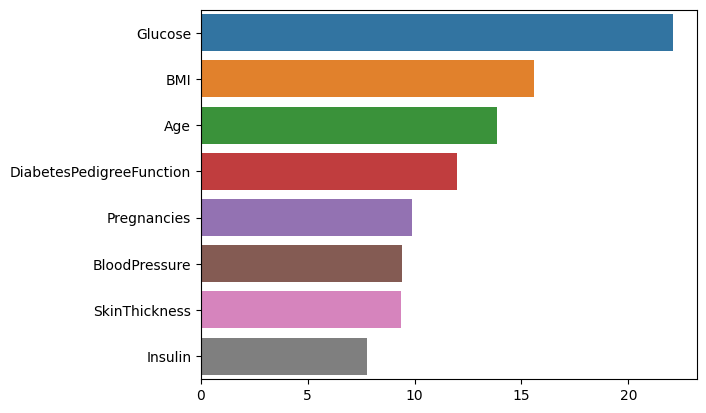

In [16]:
feature_imp = pd.Series(catb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index);